# 長庚大學 資工系/人工智慧學程  樣形識別/深度學習 課程使用之教材及示範程式 Ch02

In [31]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

In [32]:
(xr,yr), (xt,yt)= keras.datasets.mnist.load_data()

In [33]:
xr.shape, yr.shape, xt.shape, yt.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [34]:
x= xr[0]
#%%
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

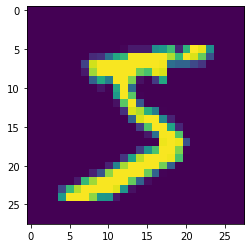

In [35]:
import matplotlib.pyplot as pl
pl.imshow(x)

# 想想看，你能做那些改進來提升正確率 (accuracy) ？


原本範例:

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2963 - accuracy: 0.9145

Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1250 - accuracy: 0.9625

Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0869 - accuracy: 0.9745

Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0669 - accuracy: 0.9794

Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0530 - accuracy: 0.9837

Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0436 - accuracy: 0.9867

Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0355 - accuracy: 0.9889

Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0294 - accuracy: 0.9915

Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0246 - accuracy: 0.9922

Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0202 - accuracy: 0.9939

313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9817
[0.07507367432117462, 0.9817000031471252]


*   增加keras.layers.Dense 係數
*   增加xt.reshape 係數



In [39]:
xr1= xr.reshape(-1,28*28) /255
xt1= xt.reshape(-1,28*28) /255

aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(200, activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 5s 6ms/step - loss: 0.2743 - accuracy: 0.9217
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1146 - accuracy: 0.9647
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0789 - accuracy: 0.9759
Epoch 4/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0580 - accuracy: 0.9818
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0465 - accuracy: 0.9856
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0367 - accuracy: 0.9887
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0298 - accuracy: 0.9908
Epoch 8/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0246 - accuracy: 0.9929
Epoch 9/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0199 - accuracy: 0.9937
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9809

[0.08273880928754807, 0.98089998960495]

In [41]:
xr1= xr.reshape(-1,28*28) /255
xt1= xt.reshape(-4,28*28) /255

aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(200, activation= 'relu'), 
    keras.layers.Dense(50,  activation= 'relu'), 
    keras.layers.Dense(10,  activation= 'softmax')
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2820 - accuracy: 0.9174
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1138 - accuracy: 0.9662
Epoch 3/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0778 - accuracy: 0.9762
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0590 - accuracy: 0.9824
Epoch 5/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0468 - accuracy: 0.9857
Epoch 6/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0364 - accuracy: 0.9885
Epoch 7/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0305 - accuracy: 0.9903
Epoch 8/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0242 - accuracy: 0.9926
Epoch 9/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0200 - accuracy: 0.9940
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0801 - accuracy: 0.9801

[0.08009420335292816, 0.9800999760627747]